In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df=pd.read_csv('Cleaned_Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [3]:
df.drop(['day','month','year'],axis=1,inplace=True)
df

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,0,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,1,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,1,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,1,1


In [4]:
x=df.drop('FWI',axis=1)
y=df.FWI
x.shape,y.shape

((244, 11), (244,))

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.15,random_state=40)
x_train.shape,y_train.shape

((207, 11), (207,))

<Axes: >

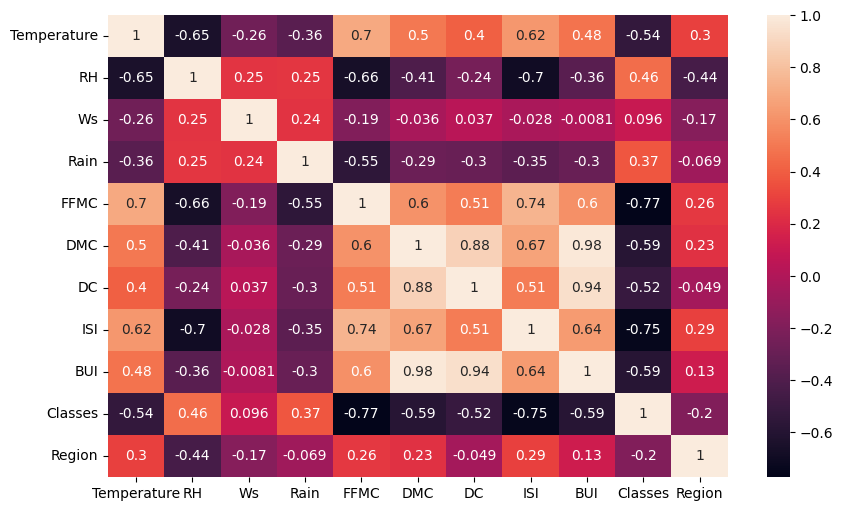

In [7]:
plt.subplots(figsize=(10,6))
sb.heatmap(x_train.corr(),annot=True)

In [8]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.647576,-0.264387,-0.359617,0.697664,0.496274,0.404863,0.619520,0.476642,-0.537110,0.299514
RH,-0.647576,1.000000,0.247218,0.253813,-0.664799,-0.410179,-0.239581,-0.695576,-0.359255,0.456147,-0.442037
Ws,-0.264387,0.247218,1.000000,0.243058,-0.193500,-0.035731,0.036789,-0.027872,-0.008107,0.096227,-0.173520
Rain,-0.359617,0.253813,0.243058,1.000000,-0.554382,-0.286694,-0.298042,-0.348706,-0.297631,0.370091,-0.069256
FFMC,0.697664,-0.664799,-0.193500,-0.554382,1.000000,0.604996,0.514378,0.744093,0.595203,-0.773177,0.260270
DMC,0.496274,-0.410179,-0.035731,-0.286694,0.604996,1.000000,0.877894,0.672471,0.982444,-0.589349,0.232740
DC,0.404863,-0.239581,0.036789,-0.298042,0.514378,0.877894,1.000000,0.508694,0.941772,-0.516183,-0.049071
ISI,0.619520,-0.695576,-0.027872,-0.348706,0.744093,0.672471,0.508694,1.000000,0.639730,-0.748373,0.294795
BUI,0.476642,-0.359255,-0.008107,-0.297631,0.595203,0.982444,0.941772,0.639730,1.000000,-0.591412,0.126998
Classes,-0.537110,0.456147,0.096227,0.370091,-0.773177,-0.589349,-0.516183,-0.748373,-0.591412,1.000000,-0.195379


In [9]:
x_train.drop(['Ws','Rain'],axis=1,inplace=True)
x_test.drop(['Ws','Rain'],axis=1,inplace=True)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [11]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

<Axes: >

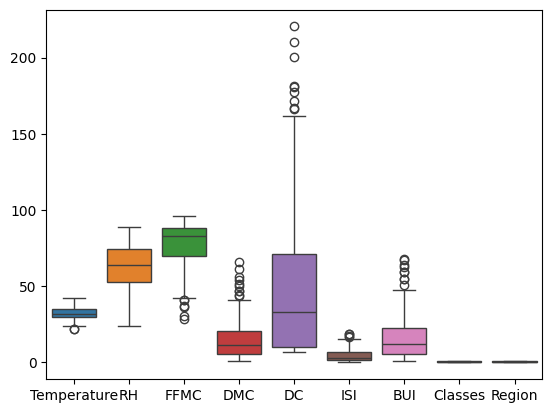

In [12]:
sb.boxplot(x_train)

<Axes: >

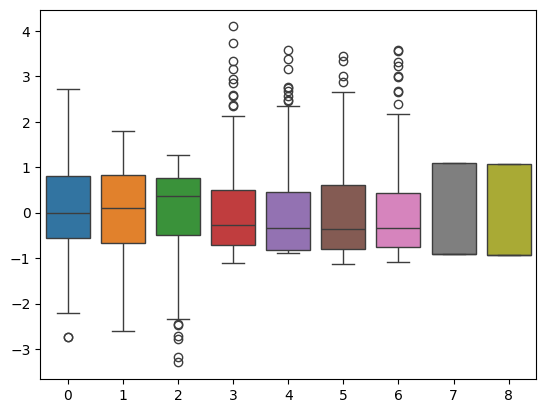

In [13]:
sb.boxplot(x_train_scaled)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
model=LinearRegression()
model.fit(x_train_scaled,y_train)
reg_pred=model.predict(x_test_scaled)
mean_squared_error(y_test,reg_pred), mean_absolute_error(y_test,reg_pred), model.score(x_test_scaled,y_test)

(0.8672359556559213, 0.6622791396178825, 0.9837324560916253)

<Axes: xlabel='FWI'>

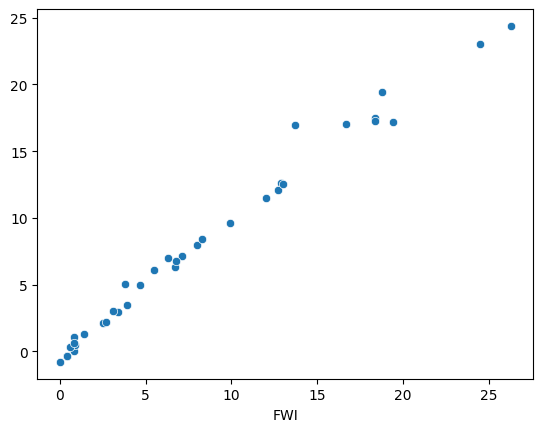

In [15]:
sb.scatterplot(x=y_test,y=reg_pred)

---
# Lasso Regression

In [16]:
from sklearn.linear_model import Lasso
model=Lasso()
model.fit(x_train_scaled,y_train)
lasso_pred=model.predict(x_test_scaled)
mean_squared_error(y_test,lasso_pred), mean_absolute_error(y_test,lasso_pred), model.score(x_test_scaled,y_test)

(2.642451593559817, 1.2298327929470072, 0.9504331006531238)

<Axes: xlabel='FWI'>

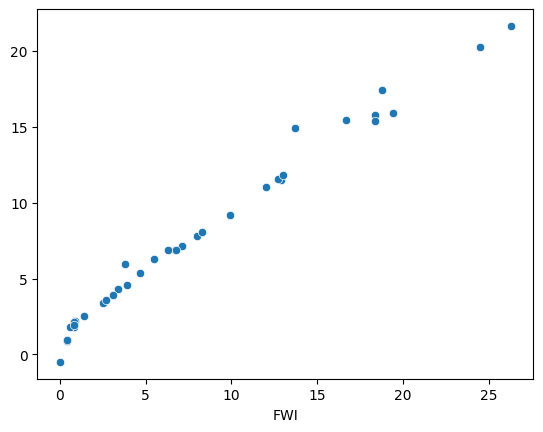

In [17]:
sb.scatterplot(x=y_test,y=lasso_pred)

---
# Ridge Regression

In [18]:
from sklearn.linear_model import Ridge
model=Ridge()
model.fit(x_train_scaled,y_train)
ridge_pred=model.predict(x_test_scaled)
mean_squared_error(y_test,ridge_pred), mean_absolute_error(y_test,ridge_pred), model.score(x_test_scaled,y_test)

(0.8680581259364425, 0.6634180345174117, 0.9837170338861099)

<Axes: xlabel='FWI'>

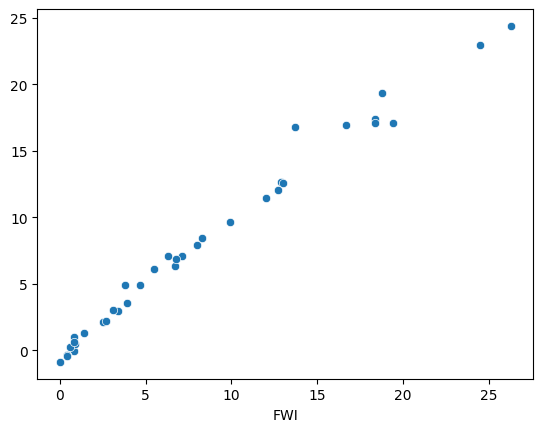

In [19]:
sb.scatterplot(x=y_test,y=ridge_pred)

---
# ElasticNet

In [20]:
from sklearn.linear_model import ElasticNet
model=ElasticNet()
model.fit(x_train_scaled,y_train)
elast_pred=model.predict(x_test_scaled)
mean_squared_error(y_test,elast_pred), mean_absolute_error(y_test,elast_pred), model.score(x_test_scaled,y_test)

(5.750734862649987, 1.8507439656287026, 0.8921281673419267)

<Axes: xlabel='FWI'>

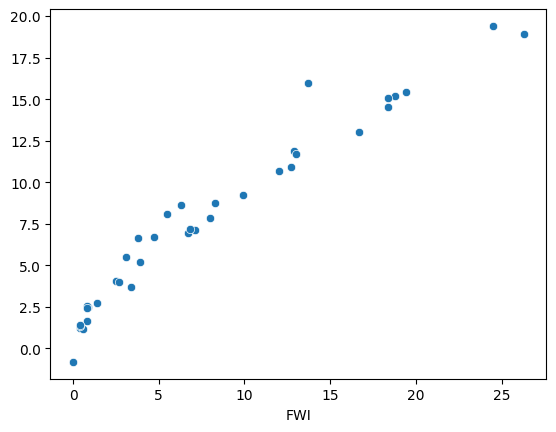

In [21]:
sb.scatterplot(x=y_test,y=elast_pred)

---
Use the modelCV (lassoCV, ridgeCV...) for performing the hyperparameter tuning and adjust the scores accordingly

---
<br><br><br>
# **Classification Problem**